In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #plot styling
import numpy as np

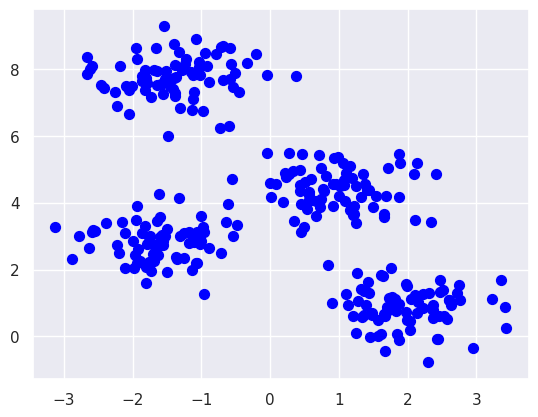

In [ ]:
# Import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Create a scatter plot
plt.scatter(X[:, 0], X[:, 1], s=50, color='blue')
plt.show()


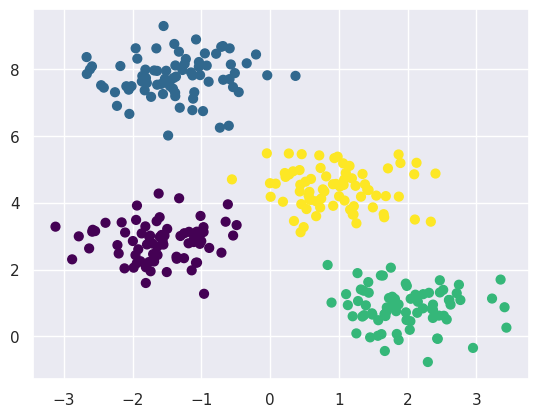

In [ ]:
# Import libraries
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Fit GMM with 4 components to data
gmm = GaussianMixture(n_components=4).fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Create scatter plot with cluster colors
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

# Display the plot
plt.show()


In [ ]:
# Get probability scores for cluster assignments
probs = gmm.predict_proba(X)

# Print the first 5 probability scores rounded to 3 decimal places
print(probs[:5].round(3))


[[0.002 0.    0.972 0.026]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.999 0.001]]


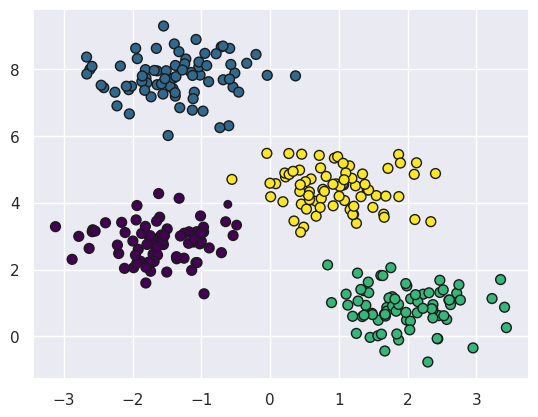

In [ ]:
#print(probs.max(1))
size=probs.max(1)/0.02 #square emphasizes differences
plt.scatter(X[:,0],X[:,1],c=labels,edgecolor='k',cmap='viridis',s=size);

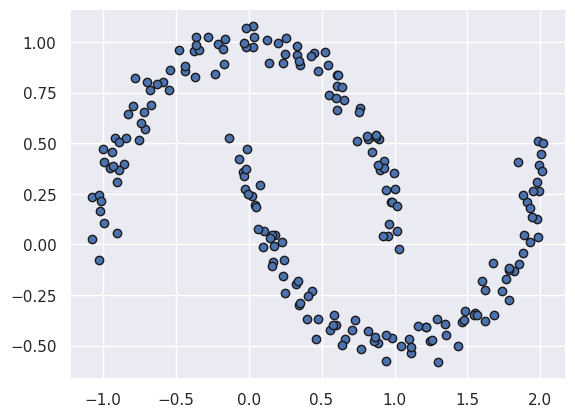

In [ ]:
# Generate a synthetic dataset of two moon-shaped clusters with noise.
# Import necessary libraries.
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Create a dataset of 200 data points with two moon shapes and added noise.
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)

# Visualize the dataset by plotting it as a scatter plot.
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], edgecolor='k')

In [ ]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
  """Draw an ellipse with a given position and covariance"""
  ax = ax or plt.gca()
# Convert covariance to principal axes
  if covariance.shape == (2, 2):
   U, s, Vt = np.linalg.svd(covariance)
   angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
   width, height = 2 * np.sqrt(s)
  else:
   angle = 0
   width, height = 2 * np.sqrt(covariance)
  # Draw the Ellipse
  for nsig in range(1, 4):
   ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis',zorder=2,edgecolor='k')
  else:
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2,cmap='viridis',edgecolor='k')
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
       draw_ellipse(pos, covar, alpha=w * w_factor)

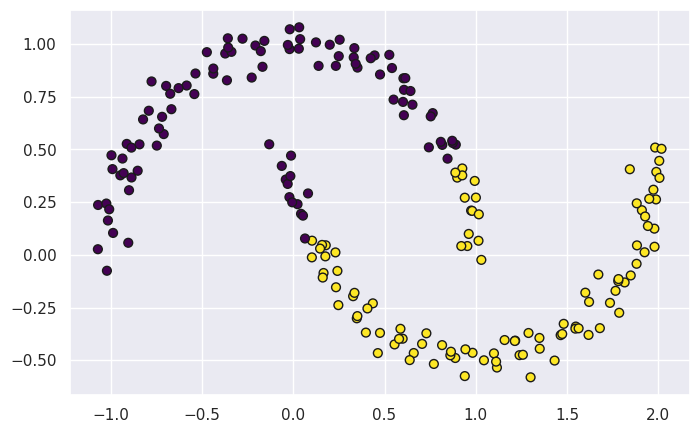

In [ ]:
#No.Components determine the gmm structure and its distribution
gmm2= GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(8,5))
plot_gmm(gmm2,Xmoon)

In [ ]:
probs=gmm.predict_proba(Xmoon)
print(probs[:5].round(3))

[[0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.741 0.    0.259 0.   ]
 [0.    0.    1.    0.   ]]


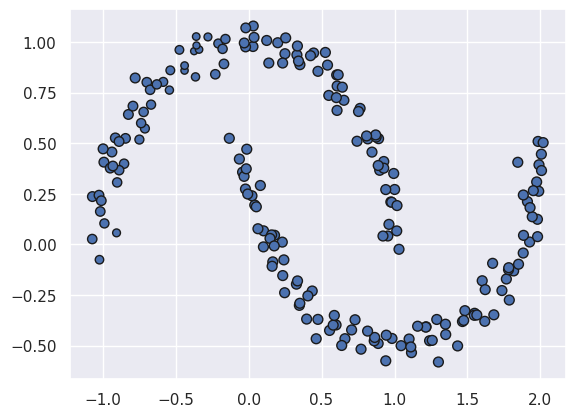

In [ ]:
#print(probs.max(1))
size=probs.max(1)/0.02 #square emphasizes differences
plt.scatter(Xmoon[:,0],Xmoon[:,1],edgecolor='k',s=size)